# OCO-2 MIP Top-down CO2 Budgets

## Approach

1. Read in National CO2 Budgets using Pandas
2. Sub-select the data structure using Pandas
3. Visualize the CO2 budgets for a country
4. Investigate uncertainties and metrics for understanding the dataset

## About the Data

This tutorial shows how to explore and plot the dataset reported in:

Byrne et al.: National CO2 budgets (2015–2020) inferred from atmospheric CO2 observations in support of the global stocktake, Earth Syst. Sci. Data, 15, 963–1004, https://doi.org/10.5194/essd-15-963-2023, 2023. 

## Import required modules
First we will need to import the relevant python modules:

In [2]:
import pandas as pd # for manipulating csv dataset
import numpy as np
import matplotlib.pyplot as plt # make plots
from scipy.stats import norm # We will use this for understanding significance

## Read the CO2 National budget dataset

Now we will read in the csv dataset from https://ceos.org/gst/carbon-dioxide.html

In [3]:
url ='https://ceos.org/gst/files/pilot_topdown_CO2_Budget_countries_v1.csv'
df_all = pd.read_csv(url, skiprows=52)

## Sub-select a single top-down dataset (experiment)

To simplify the analysis, let's subselect the results for a single experiment. The experiments are:
- IS: estimates fluxes from in situ CO2 measurements
- LNLG: estimates fluxes from OCO-2 land CO2 data
- LNLGIS: combines in situ and OCO-2 land CO2 data
- LNLGOGIS: combines in situ and OCO-2 land and ocean CO2 data

We would like to use the experiment that uses the most high-quality CO2 data. There are some concerns about small residual biases in OCO-2 ocean data (Byrne et al., 2023), so let's use the LNLGIS experiment.

In [4]:
# Choose one experiment from the list ['IS', 'LNLG', 'LNLGIS', 'LNLGOGIS']
experiment = 'LNLGIS'

# Subset of columns for a given experiment
if experiment == 'IS':
    df = df_all.drop(df_all.columns[[4,5,6,7,8,9,12,13,14,15,16,17,20,21,22,23,24,25,34,35,36]], axis=1)
if experiment == 'LNLG':
    df = df_all.drop(df_all.columns[[2,3,6,7,8,9,10,11,14,15,16,17,18,19,22,23,24,25,33,35,36]], axis=1)
if experiment == 'LNLGIS':
    df = df_all.drop(df_all.columns[[2,3,4,5,8,9,10,11,12,13,16,17,18,19,20,21,24,25,33,34,36]], axis=1)
if experiment == 'LNLGOGIS':
    df = df_all.drop(df_all.columns[[2,3,4,5,6,7,10,11,12,13,14,15,18,19,20,21,22,23,33,34,35]], axis=1)

# We can now look at the colums of data
df.head()

,Alpha 3 Code,Year,LNLGIS dC_loss (TgCO2),LNLGIS dC_loss unc (TgCO2),LNLGIS NBE (TgCO2),LNLGIS NBE unc (TgCO2),LNLGIS NCE (TgCO2),LNLGIS NCE unc (TgCO2),Rivers (TgCO2),River unc (TgCO2),Wood+Crop (TgCO2),Wood+Crop unc (TgCO2),FF (TgCO2),FF unc (TgCO2),Z-statistic,FUR LNLGIS
0,AFG,2015,39.3407,153.746,40.9643,153.746,60.3537,153.744,-2.43286,1.69832,4.05648,1.21694,19.3894,0.797698,0.37,0.19
1,AFG,2016,50.6167,175.454,52.5114,175.454,73.0333,175.452,-2.16185,2.24033,4.05648,1.21694,20.5220,0.678080,0.31,0.19
2,AFG,2017,54.5096,179.794,56.4726,179.794,77.5355,179.793,-2.09349,2.37705,4.05648,1.21694,21.0629,0.695856,0.47,0.19
3,AFG,2018,116.4260,243.057,118.4610,243.057,143.9580,243.056,-2.02199,2.52005,4.05648,1.21694,25.4974,0.695856,0.39,0.19
4,AFG,2019,64.0162,181.516,66.0388,181.516,93.8974,181.514,-2.03383,2.49637,4.05648,1.21694,27.8585,0.797698,0.49,0.19


## Sub-select a single country

Let's further filter the dataset to look at a specific country. Choose a country by entering the alpha code in the country_name variable below

In [5]:
# Choose a country
country_name = 'USA' 

# We can sub-select the data for the country
country_data = df[df['Alpha 3 Code'] == country_name]

# Now we can look at the data for a specific experiment and country
country_data.head()

,Alpha 3 Code,Year,LNLGIS dC_loss (TgCO2),LNLGIS dC_loss unc (TgCO2),LNLGIS NBE (TgCO2),LNLGIS NBE unc (TgCO2),LNLGIS NCE (TgCO2),LNLGIS NCE unc (TgCO2),Rivers (TgCO2),River unc (TgCO2),Wood+Crop (TgCO2),Wood+Crop unc (TgCO2),FF (TgCO2),FF unc (TgCO2),Z-statistic,FUR LNLGIS
1232,USA,2015,-1031.83,721.213,-1346.46,721.213,4017.31,713.897,-165.430,71.7453,-149.196,-44.7589,5363.77,102.4670,-0.81,0.91
1233,USA,2016,-1419.92,399.738,-1743.80,399.738,3529.45,387.079,-174.684,53.2375,-149.196,-44.7589,5273.24,99.8012,0.04,0.91
1234,USA,2017,-1375.12,1034.010,-1696.63,1034.010,3515.14,1029.250,-172.308,57.9894,-149.196,-44.7589,5211.76,99.0981,0.67,0.91
1235,USA,2018,-1018.89,784.463,-1333.83,784.463,4036.65,778.179,-165.747,71.1117,-149.196,-44.7589,5370.48,99.0981,-0.20,0.91
1236,USA,2019,-1161.41,718.054,-1504.61,718.054,3728.95,710.705,-194.005,14.5948,-149.196,-44.7589,5233.56,102.4670,-0.38,0.91


## Make a timeseries plot

This dataset contains fluxes over a five year period, 2015-2020. 

Let's look at a plot of the annual net terrestrial carbon stock loss (ΔC<sub>loss</sub>) for each year.

(-0.30000000000000004, 6.3)

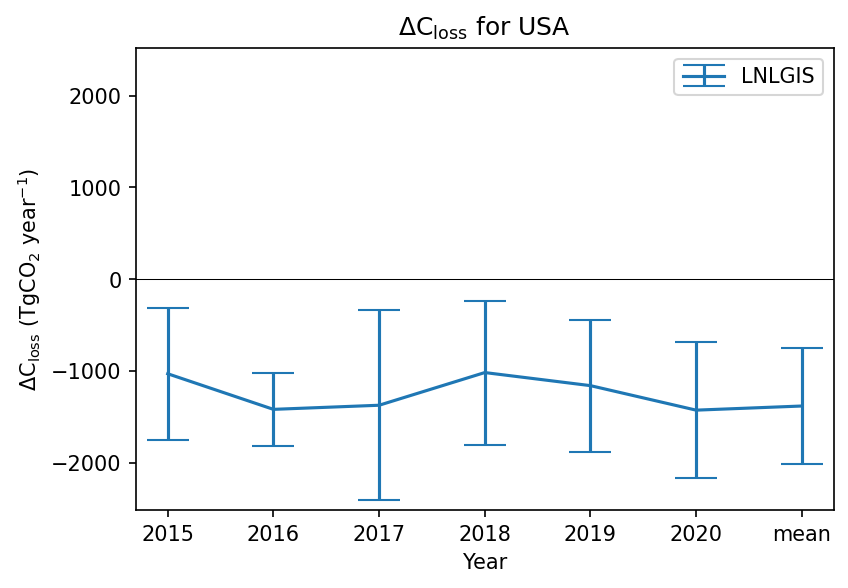

In [6]:
# Make plot
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi = 150)
ax1.errorbar(country_data['Year'],country_data[experiment+' dC_loss (TgCO2)'],
                    yerr=country_data[experiment+' dC_loss unc (TgCO2)'],label=experiment,capsize=10)
ax1.legend(loc='upper right')
ax1.set_ylabel('$\Delta$C$_\mathrm{loss}$ (TgCO$_2$ year$^{-1}$)')

ax1.set_xlabel('Year')
ax1.set_title('$\Delta$C$_\mathrm{loss}$ for '+country_name)
ymin, ymax = ax1.get_ylim()
max_abs_y = max(abs(ymin), abs(ymax))
ax1.set_ylim([-max_abs_y, max_abs_y])
xmin, xmax = ax1.get_xlim()
ax1.plot([xmin,xmax],[0,0],'k',linewidth=0.5)
ax1.set_xlim([xmin, xmax])

## Make a national CO2 budget plot

Next, we can look at the full carbon budget for a given year.

The code below creates a plot similar to Fig 13 of Byrne et al. (2023). Each of the bars on the left side of the dashed vertical line (Fossil fuel emissions, lateral C transport by rivers, lateral C transport in crop and wood products, and the net terrestrial carbon stock loss combined to give the net carbon exchange (net surface-atmosphere CO2 flux) shown on the right.

1238   -44.7589
Name: Wood+Crop unc (TgCO2), dtype: float64


Text(0, 0.5, 'CO$_2$ Flux (TgCO$_2$ year$^{-1}$)')

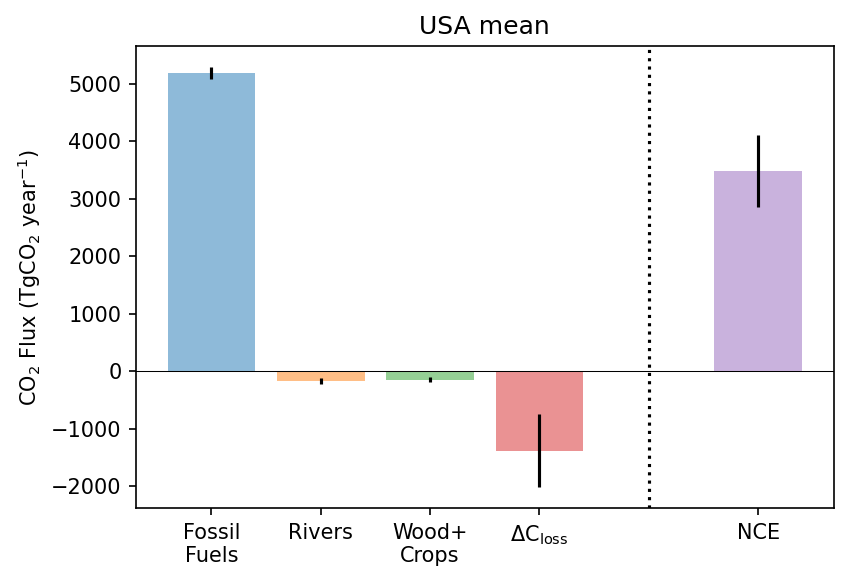

In [12]:
# Pick a specifc year (or mean year)
year='mean'
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi = 150)

# Make plot
country_data_mean = country_data[country_data['Year'] == year]
a=country_data_mean['Wood+Crop (TgCO2)']
b=country_data_mean['Wood+Crop unc (TgCO2)']
print(b)
#
plt.bar(1, country_data_mean['FF (TgCO2)'], yerr=country_data_mean['FF unc (TgCO2)'], label='FF', alpha=0.5)
plt.bar(2, country_data_mean['Rivers (TgCO2)'], yerr=country_data_mean['River unc (TgCO2)'], label='Rivers', alpha=0.5)
plt.bar(3, country_data_mean['Wood+Crop (TgCO2)'], yerr=abs(country_data_mean['Wood+Crop unc (TgCO2)']), label='WoodCrop', alpha=0.5)
plt.bar(4, country_data_mean[experiment+' dC_loss (TgCO2)'], yerr=country_data_mean['LNLGIS dC_loss unc (TgCO2)'], label='dC', alpha=0.5)
plt.bar(6, country_data_mean[experiment+' NCE (TgCO2)'], yerr=country_data_mean['LNLGIS NCE unc (TgCO2)'], label='NCE', alpha=0.5)
ax = plt.gca()
ymin, ymax = ax.get_ylim()
plt.plot([5,5],[ymin,ymax],'k:')
xmin, xmax = ax.get_xlim()
plt.plot([xmin,xmax],[0,0],'k',linewidth=0.5)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
#
plt.xticks([1,2,3,4,6], ['Fossil\nFuels','Rivers','Wood+\nCrops','$\mathrm{\Delta C _{loss}}$','NCE'])
plt.title(country_name+' '+year)
plt.ylabel('CO$_2$ Flux (TgCO$_2$ year$^{-1}$)')

## Make a plot of mean estimate and uncertainty

Uncertainty is an important consideration when analyzing the flux estimates provided by Byrne et al. (2023).

Each flux estimate is provided with an error estimate representing the standard deviation, and assuming the errors are well represented by a normal distribution. This probability dirtribution provided by this uncertainty can be visualized below. We can further quantify the statistical difference from a "comparsion value" specified below.   

In [1]:

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi = 150)

# Select NCE, NBE or dC_loss
quantity = 'dC_loss'

# Value for comparison
comparison_value = 1000 # TgCO2/year


MIP_mean = country_data_mean[experiment+' '+quantity+' (TgCO2)'].item()
MIP_std = country_data_mean[experiment+' '+quantity+' unc (TgCO2)'].item()

# Perform t-test
t_value = abs(MIP_mean - comparison_value)/(MIP_std / np.sqrt(11))
crtical_value = 2.23 # use p=0.05 significance
if t_value > crtical_value:
    ttest = 'statistically different'
if t_value < crtical_value:
    ttest = 'not statistically\ndifferent'

# Make plot
xbounds = abs(MIP_mean)+MIP_std*4
if abs(crtical_value) > xbounds:
    xbounds = abs(crtical_value)
x_axis = np.arange(-1.*xbounds, xbounds, 1) 
plt.plot(x_axis, norm.pdf(x_axis, MIP_mean, MIP_std)) 
ax = plt.gca()
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
plt.plot([0,0],[ymin,ymax*1.2],'k:',linewidth=0.5)
plt.plot([xmin,xmax],[0,0],'k:',linewidth=0.5)
plt.plot([comparison_value,comparison_value],[ymin,ymax*1.2],'k')
plt.text(comparison_value+(xmax-xmin)*0.01,ymax*0.96,'value = '+str(comparison_value),ha='left',va='top')
plt.text(comparison_value+(xmax-xmin)*0.01,ymax*0.9,ttest,ha='left',va='top')
plt.ylim([ymin,ymax*1.2])
plt.xlim([xmin,xmax])
plt.plot(MIP_mean,ymax*1.03,'ko')
plt.plot([MIP_mean-MIP_std,
         MIP_mean+MIP_std],
         [ymax*1.03,ymax*1.03],'k')
plt.plot([MIP_mean-MIP_std,
         MIP_mean-MIP_std],
         [ymax*1.005,ymax*1.055],'k')
plt.plot([MIP_mean+MIP_std,
         MIP_mean+MIP_std],
         [ymax*1.005,ymax*1.055],'k')
plt.text(MIP_mean,ymax*1.115,
         str(round(MIP_mean))+' $\pm$ '+
         str(round(MIP_std))+' TgCO$_2$',ha='center')
plt.title(country_name+' '+year+' '+quantity+'')
plt.yticks([])
plt.ylabel('Probability')
plt.xlabel(quantity+' (TgCO$_2$ year$^{-1}$)')

NameError: name 'plt' is not defined

## Plot metrics that come with the CO2 flux estimates

Finally, we will examine two metrics that are useful for understanding the confidence in the top-down results:

- Z-statistic: metric of agreement in NCE estimates across the experiments that assimilate different CO2 datasets. Experiments are considered significantly different if the magnitude exceeds 1.96

- Fractional Uncertainty Reduction (FUR): metric of how strongly the assimilated CO2 data on reduce NCE uncertainties. Values range from 0 to 1, with 0 meaning zero error reduction and 1 meaning complete error reduction

Here we will add a plot of the Z-statistic for each year, and add the FUR value for the country.

Text(-0.18000000000000005, 2.6, 'Fractional error reduction: 0.91')

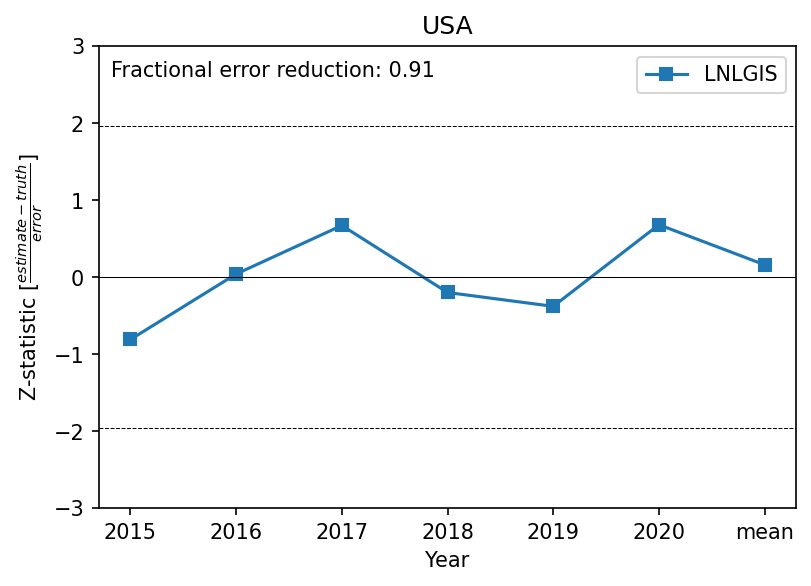

In [32]:
# Make plot
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi = 150)
ax1.plot(country_data['Year'],country_data['Z-statistic'],label=experiment, marker = "s")
ax1.legend(loc='upper right')
ax1.set_ylabel('Z-statistic $[\\frac{estimate-truth}{error}]$') #????
ax1.set_xlabel('Year')
ax1.set_title(country_name)
ymin, ymax = ax1.get_ylim()
max_abs_y = max(abs(ymin), abs(ymax))
ax1.set_ylim([-3, 3])
xmin, xmax = ax1.get_xlim()
ax1.plot([xmin,xmax],[0,0],'k',linewidth=0.5)
ax1.plot([xmin,xmax],[-1.96,-1.96],'k--',linewidth=0.5)
ax1.plot([xmin,xmax],[1.96,1.96],'k--',linewidth=0.5)
ax1.set_xlim([xmin, xmax])
ax1.text(xmin+0.12,2.6,'Fractional error reduction: '+str(country_data['FUR '+experiment].iloc[1]))